<a href="https://colab.research.google.com/github/afran90/Traffic_Signs_Classification/blob/master/Traffic_Signs_Classification_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D ,MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import pickle
import pandas as pd
import numpy as np
import random

In [ ]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
remote: Counting objects: 6, done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0)
Unpacking objects: 100% (6/6), done.


In [ ]:
with open("german-traffic-signs/train.p",mode='rb') as training:
  train = pickle.load(training)

with open("german-traffic-signs/valid.p",mode='rb') as validation:
  valid = pickle.load(validation)

with open("german-traffic-signs/test.p",mode='rb') as testing:
  test = pickle.load(testing)

In [ ]:
data = pd.read_csv('german-traffic-signs/signnames.csv')

In [ ]:
X_train , y_train = train['features'], train['labels']
X_validation , y_validation = valid['features'], valid['labels']
X_test , y_test = test['features'], test['labels']

In [ ]:
print(X_train.shape)
print(X_validation.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


image label=34
Turn left ahead


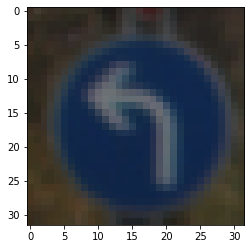

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
index = np.random.randint(1,len(X_train))
plt.imshow(X_train[index])
print("image label={}".format(y_train[index]))
print(data['SignName'][y_train[index]])

In [ ]:
from sklearn.utils import shuffle
X_train,y_train=shuffle(X_train,y_train)

In [ ]:
import cv2
def preprocessing(img): 
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img = cv2.equalizeHist(img)
  img = img/255
  return img

In [ ]:
X_train_processed = np.array(list(map(preprocessing,X_train)))
X_validation_processed = np.array(list(map(preprocessing,X_validation)))
X_test_processed = np.array(list(map(preprocessing,X_test)))

In [ ]:
X_train_processed = X_train_processed.reshape(34799, 32, 32, 1)
X_validation_processed = X_validation_processed.reshape( 4410,32,32,1 )
X_test_processed = X_test_processed.reshape(12630, 32, 32, 1)


In [ ]:
print(X_train_processed.shape)

(34799, 32, 32, 1)


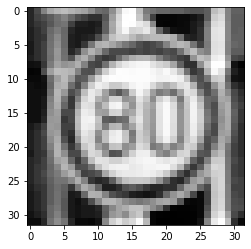

In [ ]:
import random
i= random.randint(1,len(X_train))
plt.imshow(X_train_processed[i].squeeze(),cmap='gray')

In [ ]:
model = Sequential()

model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,1)))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Conv2D(64,(5,5),activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(43,activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)              

In [ ]:
model.compile(Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_processed,y_train,batch_size=500,epochs=75,verbose=1,validation_data=(X_validation_processed,y_validation))

Train on 34799 samples, validate on 4410 samples
Epoch 1/75
34799/34799 [==============================] - 8s 234us/step - loss: 3.5576 - accuracy: 0.0604 - val_loss: 3.4911 - val_accuracy: 0.1587
Epoch 2/75
34799/34799 [==============================] - 2s 46us/step - loss: 3.3175 - accuracy: 0.1450 - val_loss: 3.1574 - val_accuracy: 0.2878
Epoch 3/75
34799/34799 [==============================] - 2s 46us/step - loss: 2.8467 - accuracy: 0.2881 - val_loss: 2.5795 - val_accuracy: 0.4279
Epoch 4/75
34799/34799 [==============================] - 2s 46us/step - loss: 2.3646 - accuracy: 0.3852 - val_loss: 2.1217 - val_accuracy: 0.4769
Epoch 5/75
34799/34799 [==============================] - 2s 46us/step - loss: 2.0172 - accuracy: 0.4497 - val_loss: 1.7786 - val_accuracy: 0.5392
Epoch 6/75
34799/34799 [==============================] - 2s 46us/step - loss: 1.7585 - accuracy: 0.5019 - val_loss: 1.5370 - val_accuracy: 0.5773
Epoch 7/75
34799/34799 [==============================] - 2s 46us/st

In [ ]:
score = model.evaluate(X_test_processed,y_test)
print('Test accuracy',score[1])

12630/12630 [==============================] - 1s 73us/step
Test accuracy 0.9240697026252747


Text(0.5, 0, 'epochs')

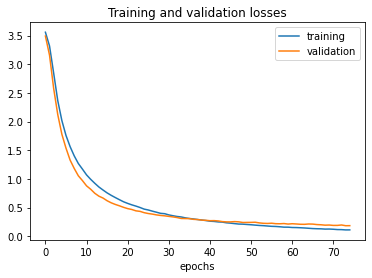

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and validation losses')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

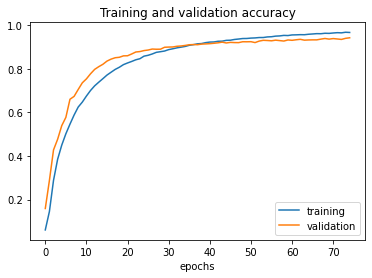

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epochs')

In [ ]:
prediction = model.predict_classes(X_test_processed)
y_true_label= y_test

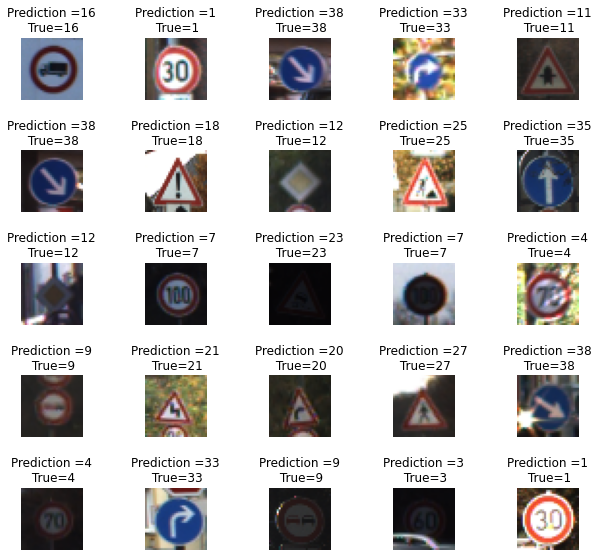

In [ ]:

fig , axes = plt.subplots(5,5,figsize=(10,10))
axes = axes.ravel()
for i in range(0,5*5):
  axes[i].imshow(X_test[i])
  axes[i].set_title('Prediction ={}\n True={}'.format(prediction[i],y_true_label[i]))
  axes[i].axis('off')
plt.subplots_adjust(wspace=1)

In [ ]:
model.save('Traffic.h5')